In [36]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [37]:
weight = 0.7
bias = 0.3

# Device configuration
device = "cuda" if torch.cuda.is_available() else "cpu"
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias
print(y)
device

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


'cpu'

In [38]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [39]:
import matplotlib.pyplot as plt

def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
    
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_labels, c='b', label='Training Data')
    plt.scatter(test_data,test_labels, c='g', label='Testing Data')
    
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',label='Predictions')
    
    plt.legend(prop={"size":14})


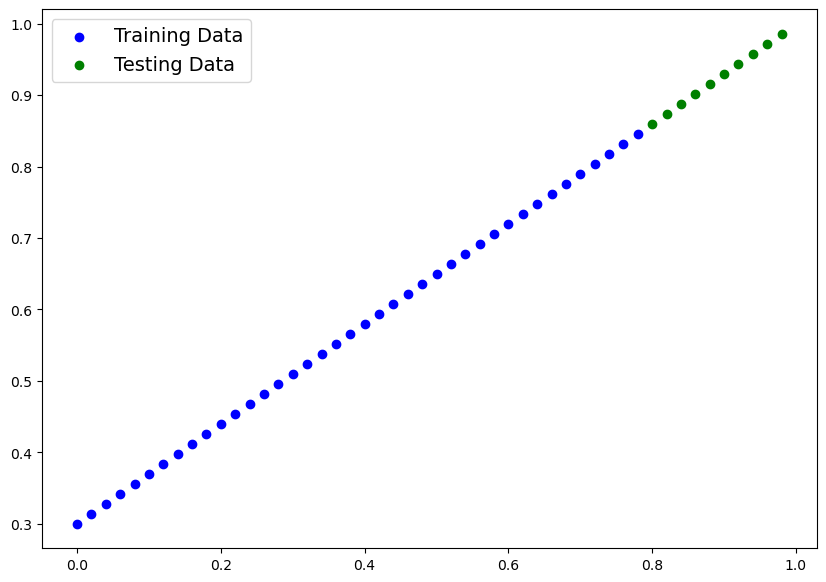

In [40]:
plot_predictions()

In [41]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(
            1, requires_grad=True,
            dtype=torch.float32))
        
        self.bias = nn.Parameter(torch.randn(
            1, requires_grad=True,
            dtype=torch.float32))
        
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return  self.weights * x + self.bias
        
        
        

In [42]:
torch.manual_seed(42)

test_model = LinearRegressionModel()

list(test_model.parameters()) # weights and bias

test_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

We started with random parameters.
The model is supposed to have the parameters be tweaked during training.

In [43]:
X_test, y_test

with torch.inference_mode():
    test_preds = test_model(X_test)



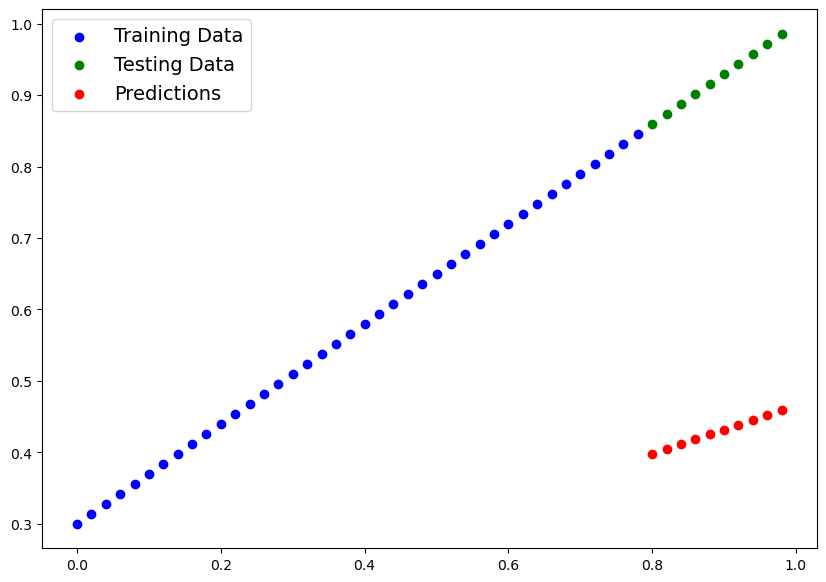

In [44]:
plot_predictions(predictions=test_preds)

** Loss function is what measures how wrong your model's predictions are to the ideal outputs

In [45]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(test_model.parameters(),lr=0.01)

In [47]:
epochs = 20

for epoch in range(epochs):
    test_model.train()
    
    # 1. Forward Pass
    y_pred = test_model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    print(f'Loss {loss.item()}')
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()  
    # test_model.eval() to switch to evaluation mode and turn off gradients

Loss 0.08908725529909134
Loss 0.08227583020925522
Loss 0.07638873159885406
Loss 0.07160007208585739
Loss 0.06747636198997498
Loss 0.06395438313484192
Loss 0.06097004562616348
Loss 0.05845819041132927
Loss 0.05635259300470352
Loss 0.0545857734978199
Loss 0.053148526698350906
Loss 0.05181945487856865
Loss 0.05069301277399063
Loss 0.049822848290205
Loss 0.04895269125699997
Loss 0.04819351062178612
Loss 0.047531817108392715
Loss 0.04692792519927025
Loss 0.04642331600189209
Loss 0.04591871052980423
